In [5]:
import tools
import regions

import importlib

from scipy.sparse.linalg import spsolve
import geopandas as gpd
#import pandas as pd
import numpy as np
#from libpysal.weights import Queen, Rook
import matplotlib.pyplot as plt
from esda.moran import Moran
#from shapely.geometry import Polygon
#import copy
import seaborn as sns
from libpysal import graph,weights
#from splot.libpysal import plot_spatial_weights
#from scipy.sparse import spmatrix, triu, diags, coo_array

#from spreg import ML_Error
importlib.reload(tools)
from tools import generate_square_lattice,build_g_rook,build_g_borders,build_g_region,remove_random_edges,simulate_autocorrelated_data, generate_hex_lattice, generate_pent_lattice, reindex, extract_subset,create_corrupted_graphs
importlib.reload(regions)
from regions import regions_dict
from math import sqrt

In [2]:
sizes = [400,100,25]
rhos = np.arange(-0.9, 1.0, 0.1)
n_runs = 10

In [3]:
perc_missing = np.linspace(5, 95, 19)     # 0–50 % edges removed
n_corrupt = 10                            # number of corruption replicates

In [6]:
shape = "square"
for size in sizes:
    gdf = generate_square_lattice(sqrt(size))
    
    
    g_rook = build_g_rook(gdf)
    g_rook.to_parquet(f"graphs\{shape}\size_{size}/g_true.parquet")
    
    gdf['region'] = gdf.index.map(regions_dict[f'reg{size}'])
    simulate_autocorrelated_data(gdf,g_rook.sparse,rhos,n_runs)
    gdf.to_parquet(f"data/gdf_{shape}_{size}.parquet")
    
    g_borders,border_remains = build_g_borders(gdf,g_rook)
    g_center_region,center_remains = build_g_region(gdf,g_rook,'center')
    g_periphery_region,periphery_remains = build_g_region(gdf,g_rook,'periphery')
    
    
    create_corrupted_graphs(g_rook,n_corrupt,perc_missing,shape,size,'random')
    create_corrupted_graphs(g_rook,n_corrupt,perc_missing,shape,size,'border',border_remains)
    create_corrupted_graphs(g_rook,n_corrupt,perc_missing,shape,size,'center',center_remains)
    create_corrupted_graphs(g_rook,n_corrupt,perc_missing,shape,size,'periphery',periphery_remains)
    

<string>:7: SyntaxWarning: invalid escape sequence '\{'
<>:7: SyntaxWarning: invalid escape sequence '\{'
<>:7: SyntaxWarning: invalid escape sequence '\s'
<string>:7: SyntaxWarning: invalid escape sequence '\{'
<>:7: SyntaxWarning: invalid escape sequence '\{'
<>:7: SyntaxWarning: invalid escape sequence '\s'
C:\Users\elapo\AppData\Local\Temp\ipykernel_21992\2342561656.py:7: SyntaxWarning: invalid escape sequence '\{'
  g_rook.to_parquet(f"graphs\{shape}\size_{size}/g_true.parquet")
C:\Users\elapo\AppData\Local\Temp\ipykernel_21992\2342561656.py:7: SyntaxWarning: invalid escape sequence '\s'
  g_rook.to_parquet(f"graphs\{shape}\size_{size}/g_true.parquet")
c:\Users\elapo\OneDrive\Dokumenty\prf\dp\code\.pixi\envs\default\Lib\site-packages\geopandas\geodataframe.py:1968: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To

In [7]:
shape = "hex"
for size in sizes:
    gdf = generate_hex_lattice(int(sqrt(size)),int(sqrt(size)))
    reindex(gdf,int(sqrt(size)))
    
    g_rook = build_g_rook(gdf)
    g_rook.to_parquet(f"graphs\{shape}\size_{size}/g_true.parquet")
    
    gdf['region'] = gdf.index.map(regions_dict[f'reg{size}'])
    simulate_autocorrelated_data(gdf,g_rook.sparse,rhos,n_runs)
    gdf.to_parquet(f"data/gdf_{shape}_{size}.parquet")
    
    g_borders,border_remains = build_g_borders(gdf,g_rook)
    g_center_region,center_remains = build_g_region(gdf,g_rook,'center')
    g_periphery_region,periphery_remains = build_g_region(gdf,g_rook,'periphery')
    
    
    create_corrupted_graphs(g_rook,n_corrupt,perc_missing,shape,size,'random')
    create_corrupted_graphs(g_rook,n_corrupt,perc_missing,shape,size,'border',border_remains)
    create_corrupted_graphs(g_rook,n_corrupt,perc_missing,shape,size,'center',center_remains)
    create_corrupted_graphs(g_rook,n_corrupt,perc_missing,shape,size,'periphery',periphery_remains)

<string>:7: SyntaxWarning: invalid escape sequence '\{'
<>:7: SyntaxWarning: invalid escape sequence '\{'
<>:7: SyntaxWarning: invalid escape sequence '\s'
<string>:7: SyntaxWarning: invalid escape sequence '\{'
<>:7: SyntaxWarning: invalid escape sequence '\{'
<>:7: SyntaxWarning: invalid escape sequence '\s'
C:\Users\elapo\AppData\Local\Temp\ipykernel_21992\3216303520.py:7: SyntaxWarning: invalid escape sequence '\{'
  g_rook.to_parquet(f"graphs\{shape}\size_{size}/g_true.parquet")
C:\Users\elapo\AppData\Local\Temp\ipykernel_21992\3216303520.py:7: SyntaxWarning: invalid escape sequence '\s'
  g_rook.to_parquet(f"graphs\{shape}\size_{size}/g_true.parquet")
c:\Users\elapo\OneDrive\Dokumenty\prf\dp\code\.pixi\envs\default\Lib\site-packages\geopandas\geodataframe.py:1968: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To

In [8]:
shape = "pent"
pent_gdfs = {}
for size in sizes:
    if size == 400:
        pent_gdfs[size] = generate_pent_lattice(11,11)
    else:
        pent_gdfs[size] = extract_subset(pent_gdfs[400],sqrt(size),sqrt(size))
        
    gdf = pent_gdfs[size]
    reindex(gdf,int(sqrt(size)))
    
    g_rook = build_g_rook(gdf)
    g_rook.to_parquet(f"graphs\{shape}\size_{size}/g_true.parquet")
    
    gdf['region'] = gdf.index.map(regions_dict[f'reg{size}'])
    simulate_autocorrelated_data(gdf,g_rook.sparse,rhos,n_runs)
    gdf.to_parquet(f"data/gdf_{shape}_{size}.parquet")
    
    g_borders,border_remains = build_g_borders(gdf,g_rook)
    g_center_region,center_remains = build_g_region(gdf,g_rook,'center')
    g_periphery_region,periphery_remains = build_g_region(gdf,g_rook,'periphery')
    
    
    create_corrupted_graphs(g_rook,n_corrupt,perc_missing,shape,size,'random')
    create_corrupted_graphs(g_rook,n_corrupt,perc_missing,shape,size,'border',border_remains)
    create_corrupted_graphs(g_rook,n_corrupt,perc_missing,shape,size,'center',center_remains)
    create_corrupted_graphs(g_rook,n_corrupt,perc_missing,shape,size,'periphery',periphery_remains)

<string>:13: SyntaxWarning: invalid escape sequence '\{'
<>:13: SyntaxWarning: invalid escape sequence '\{'
<>:13: SyntaxWarning: invalid escape sequence '\s'
<string>:13: SyntaxWarning: invalid escape sequence '\{'
<>:13: SyntaxWarning: invalid escape sequence '\{'
<>:13: SyntaxWarning: invalid escape sequence '\s'
C:\Users\elapo\AppData\Local\Temp\ipykernel_21992\2390670372.py:13: SyntaxWarning: invalid escape sequence '\{'
  g_rook.to_parquet(f"graphs\{shape}\size_{size}/g_true.parquet")
C:\Users\elapo\AppData\Local\Temp\ipykernel_21992\2390670372.py:13: SyntaxWarning: invalid escape sequence '\s'
  g_rook.to_parquet(f"graphs\{shape}\size_{size}/g_true.parquet")
c:\Users\elapo\OneDrive\Dokumenty\prf\dp\code\.pixi\envs\default\Lib\site-packages\geopandas\geodataframe.py:1968: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) ins

<Axes: >

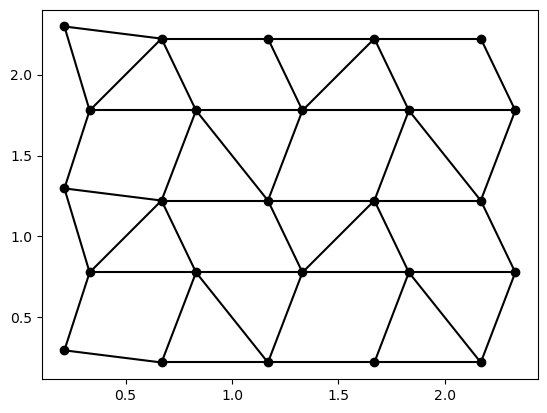

In [ ]:
g_rook.plot(pent_gdfs[25])

<>:1: SyntaxWarning: invalid escape sequence '\g'
<>:1: SyntaxWarning: invalid escape sequence '\g'
C:\Users\elapo\AppData\Local\Temp\ipykernel_23956\2850745717.py:1: SyntaxWarning: invalid escape sequence '\g'
  gdf = gpd.read_parquet('data\gdf_pent_25.parquet')


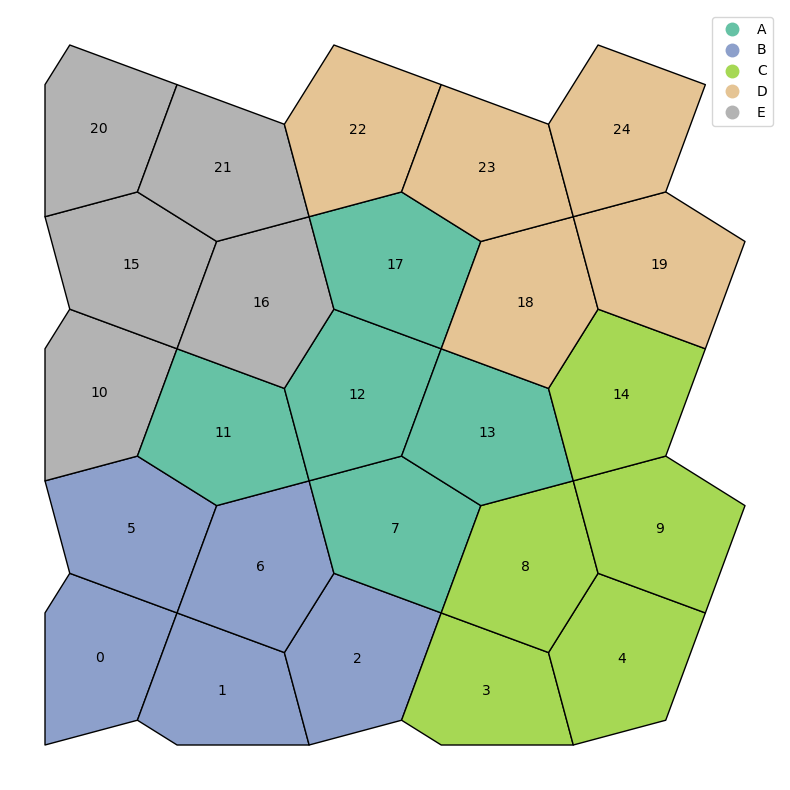

In [37]:
gdf = gpd.read_parquet('data\gdf_pent_25.parquet')
ax = gdf.plot(column='region', categorical=True, legend=True, edgecolor='black', cmap='Set2', figsize=(10, 10))
gdf.apply(lambda x: ax.annotate(text=x.name, xy=x.geometry.centroid.coords[0], ha='center', va='center'), axis=1)
ax.set_axis_off()

<Axes: >

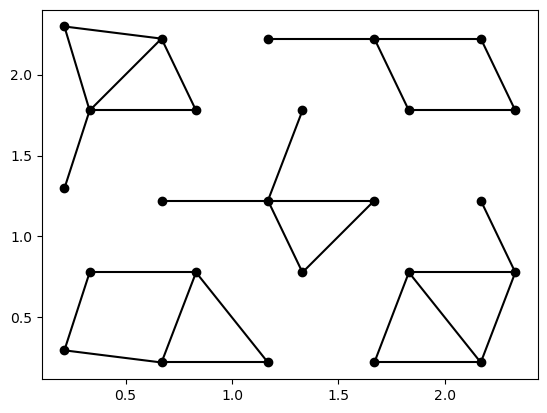

In [43]:
gb = graph.Graph.build_block_contiguity(gdf['region'])
gr = graph.Graph.build_contiguity(gdf,rook=True)
gd = gr.difference(gb)
gi = gr.intersection(gb)

ids_in_a = gdf[gdf['region'] == 'A'].index

gs = gr.subgraph(ids_in_a)
gi.plot(gdf)

In [ ]:
import pandas as pd


,focal,neighbor,weight
0,0,1,1
1,0,5,1
2,1,0,1
3,1,2,1
4,1,6,1
...,...,...,...
91,23,18,1
92,23,22,1
93,23,24,1
94,24,19,1


<Axes: >

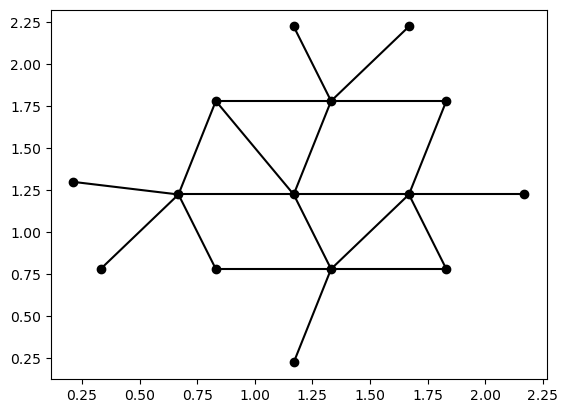

In [57]:
edges_df = gr.adjacency.reset_index()
# 3. Create a filter: Keep rows where EITHER 'focal' OR 'neighbor' is in Region A
mask = edges_df['focal'].isin(ids_in_a) | edges_df['neighbor'].isin(ids_in_a)

# 4. Apply the filter to get your final list of edges
edges_touching_a = edges_df[mask]
g_touching_a = graph.Graph.from_adjacency(edges_touching_a,'focal','neighbor','weight')
g_touching_a.plot(gdf)

In [81]:
grafik = graph.read_parquet('graphs\pent\size_400/border\g_60_2.parquet')
daticka = gpd.read_parquet('data\gdf_pent_400.parquet')

<>:1: SyntaxWarning: invalid escape sequence '\p'
<>:2: SyntaxWarning: invalid escape sequence '\g'
<>:1: SyntaxWarning: invalid escape sequence '\p'
<>:2: SyntaxWarning: invalid escape sequence '\g'
C:\Users\elapo\AppData\Local\Temp\ipykernel_23956\501914123.py:1: SyntaxWarning: invalid escape sequence '\p'
  grafik = graph.read_parquet('graphs\pent\size_400/border\g_60_2.parquet')
C:\Users\elapo\AppData\Local\Temp\ipykernel_23956\501914123.py:2: SyntaxWarning: invalid escape sequence '\g'
  daticka = gpd.read_parquet('data\gdf_pent_400.parquet')


<Axes: >

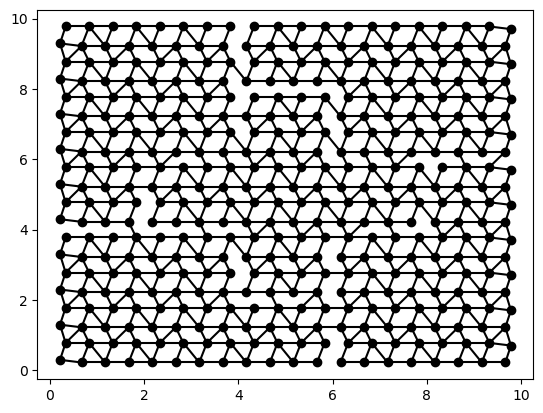

In [82]:
grafik.plot(daticka)